## Testing

### Checking the Kernel we are working in

In [2]:
import sys
print(sys.executable)

/Users/lanresodeinde/opt/anaconda3/bin/python


### Imports

In [3]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import time

### Variables

In [4]:
shots = '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/'

### Testing image reading:
- image can be read after import and 
- converted to gray scale
- Thresholding

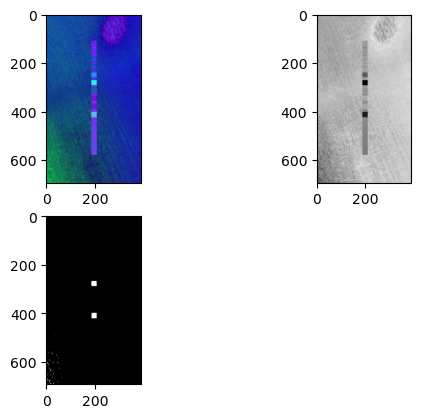

In [5]:
# reading image
# img = cv2.imread('/Users/lanresodeinde/Downloads/IMG_0694 Small.png')
img = cv2.imread(shots + '1677405915.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

fig = plt.figure()
fig.add_subplot(2,2,1)
plt.imshow(img, cmap='hsv' )

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig.add_subplot(2,2,2)
plt.imshow(gray, cmap='gray_r')

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# _, threshold = cv2.threshold(gray, 90, 100, cv2.THRESH_BINARY)
fig.add_subplot(2,2,3)
plt.imshow(threshold, cmap='gray')

## BUILDING MODEL

### Variables

In [6]:
shots = '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/'
images = ['1677405915', '1677405924', '1677405665', '1677406019', \
           '1677405730', '1677406318', '1677405851', '1677406401']

### REMBG / PILLOW cropping function

In [7]:
from PIL import Image
from rembg import remove
output_path = '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/'

def crop_image(image_path):
    input = Image.open(image_path)
    output = remove(input)
    # output.show()
    # plt.imshow(output)
    # output.save(output_path)
    return output

### Remove background from dipstick and display all images

(693, 390, 3)
(693, 390, 3)
(693, 390, 3)
(693, 390, 3)
(693, 390, 3)
(693, 390, 3)
(693, 390, 3)
(693, 390, 3)


<Figure size 1200x800 with 0 Axes>

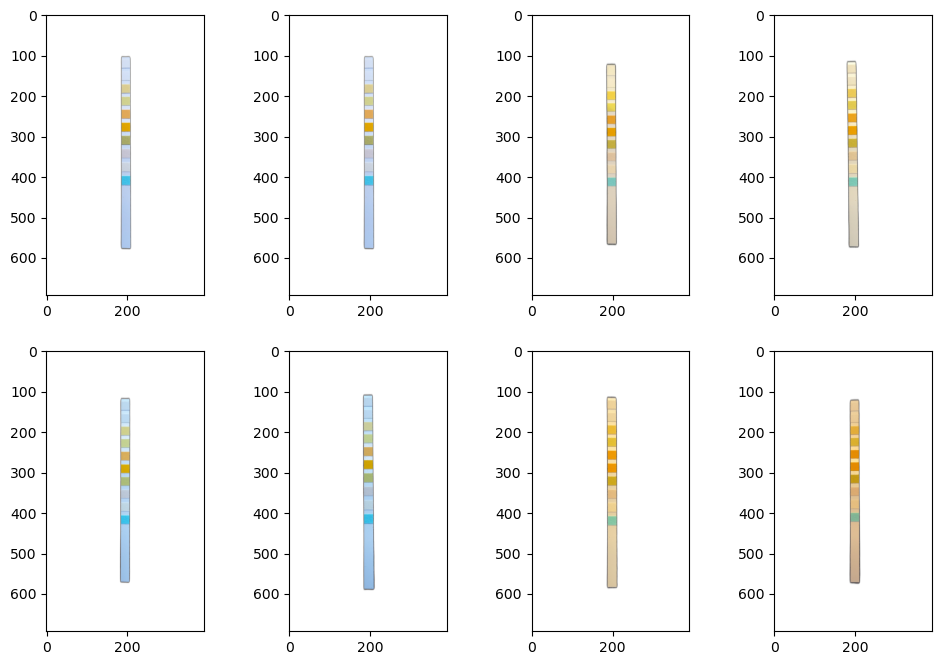

In [8]:
i = 1
p = 1
fig = plt.figure(figsize=(12,8))
fig2 = plt.figure(figsize=(12,8))

cropped_images = []

for image_name in images:
    # display all test images in one figure
    image_path = shots + image_name + '.png'
    img = cv2.imread(image_path)

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    print(img.shape)
    # display original images
    # fig.add_subplot(2,4,i)
    # fig.imshow(img)
    # i+=1

    # display images with background removed in one figure
    pillow_image = crop_image(image_path)
    cropped_image = np.array(pillow_image)

    # print(cropped_image.shape)


    cropped_images.append(cropped_image)

    fig2.add_subplot(2,4,p)
    plt.imshow(cropped_image)
    p+=1


### Slicing image
- Get rid of the white space around the image of the dipstick

(693, 390, 4)
(500, 100, 4)


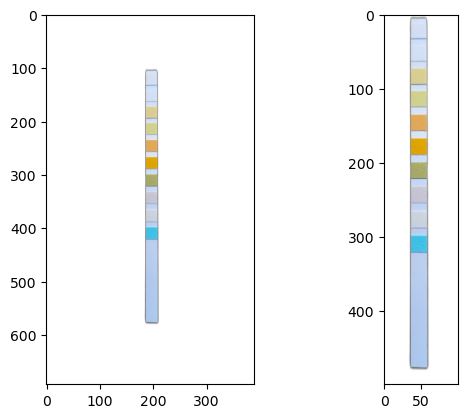

In [9]:
# try to reshape an image 
image= cropped_images[0]
print(image.shape)
fig = plt.figure()
fig.add_subplot(1,2, 1)
plt.imshow(image)

image_reshaped = image[100:600, 150:250]
print(image_reshaped.shape)
fig.add_subplot(1,2, 2)
plt.imshow(image_reshaped)


#### Function for slicing the images
- Getting rid of the big white space around the dipstick

(693, 390, 4)
(500, 40, 4)
(693, 390, 4)
(500, 40, 4)
(693, 390, 4)
(500, 40, 4)
(693, 390, 4)
(500, 40, 4)
(693, 390, 4)
(500, 40, 4)
(693, 390, 4)
(500, 40, 4)
(693, 390, 4)
(500, 40, 4)
(693, 390, 4)
(500, 40, 4)


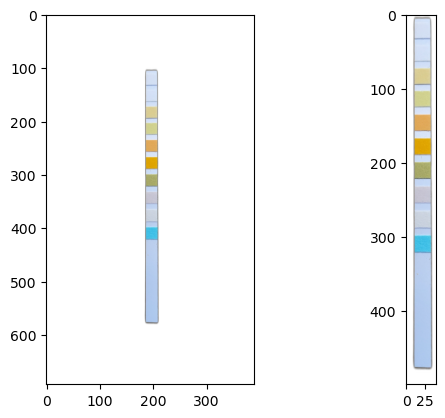

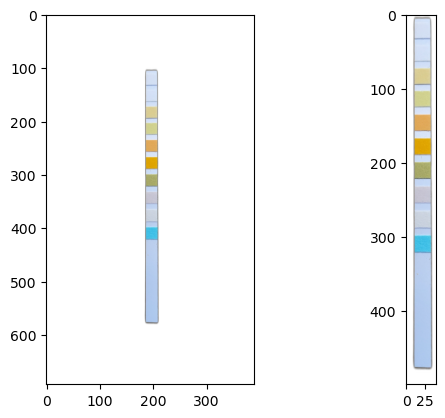

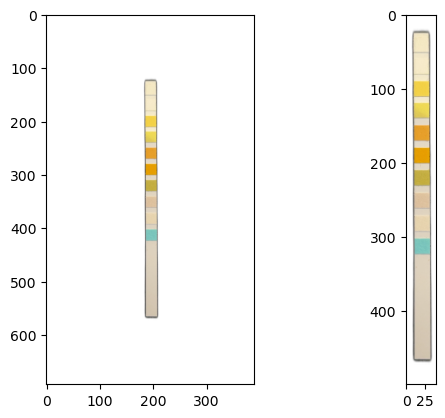

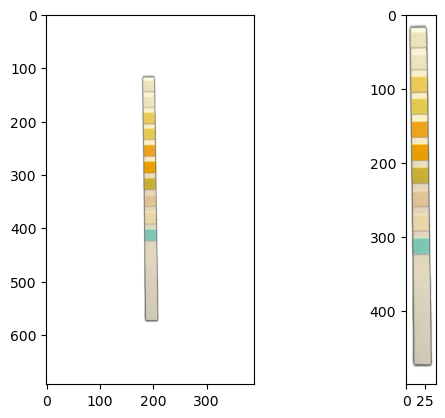

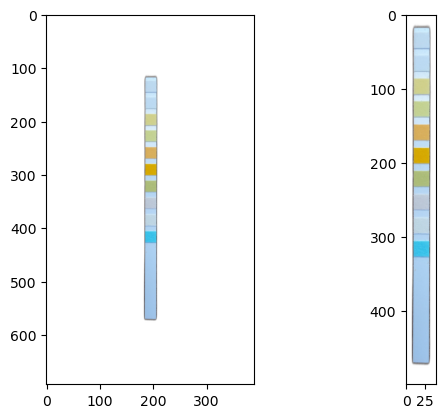

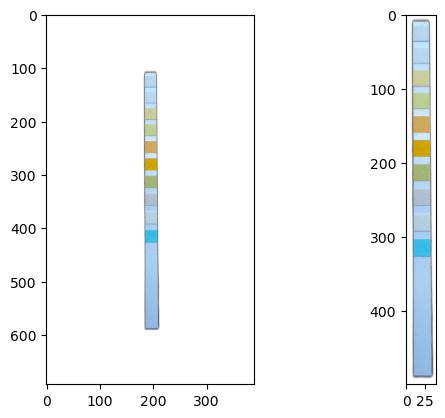

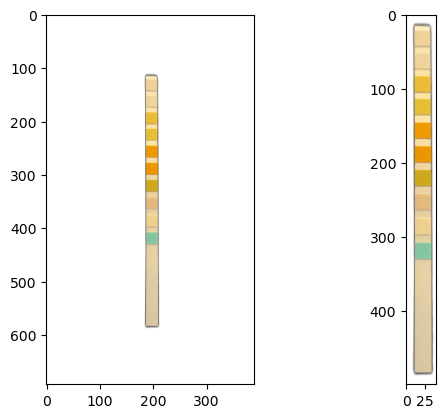

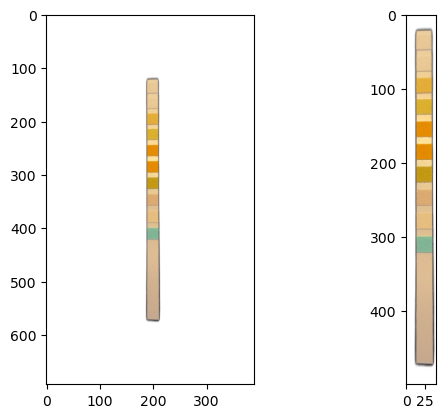

In [10]:
reshaped_images = []

def reshape_image(image):
    # original image
    print(image.shape)
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(image)

    # cropped image 
    image_reshaped = image[100:600, 175:215]
    print(image_reshaped.shape)
    fig.add_subplot(1,2,2)
    plt.imshow(image_reshaped)
    
    reshaped_images.append(image_reshaped)

for image in cropped_images:
    reshape_image(image)

    

### Slice and crop and get dimensions of dipstick
- Slice and crop the dipstick from the images with a lot of white space
- Also returns the dimensions of dipsticks

2
185 104 25 475
2
185 104 25 475
2
183 123 26 445
2
179 116 31 459
2
183 117 25 456
2
182 108 29 482
2
184 114 27 472
2
187 120 25 454


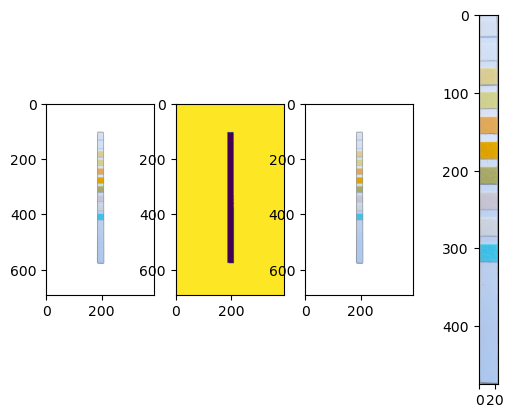

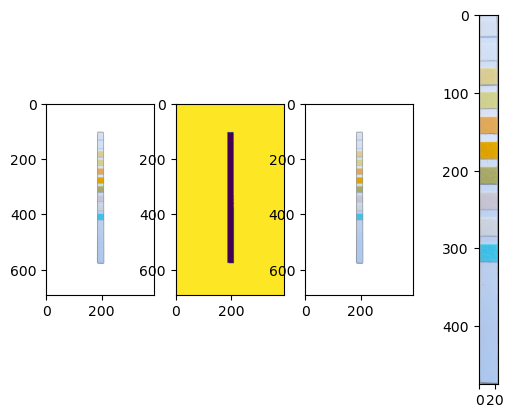

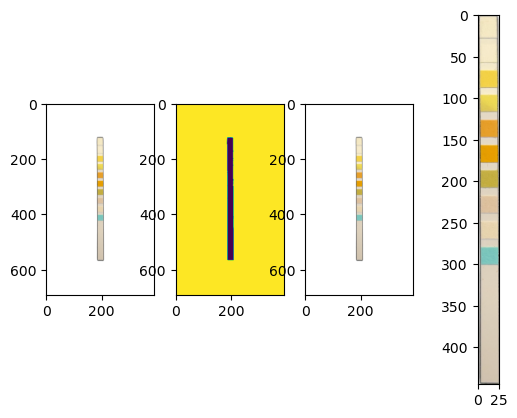

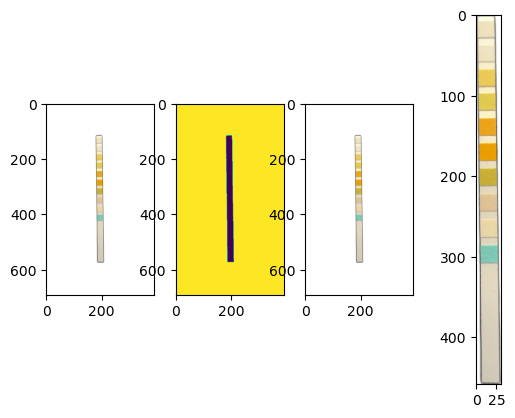

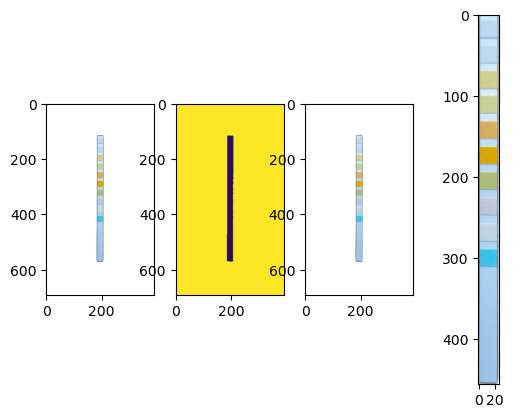

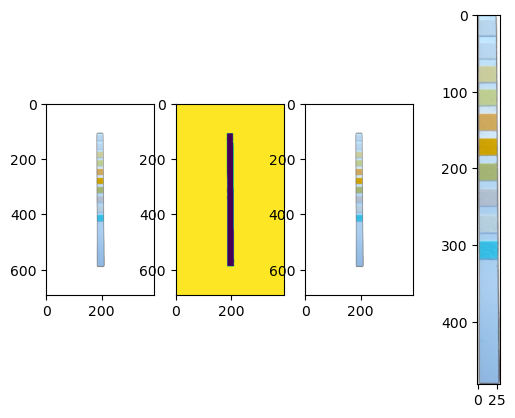

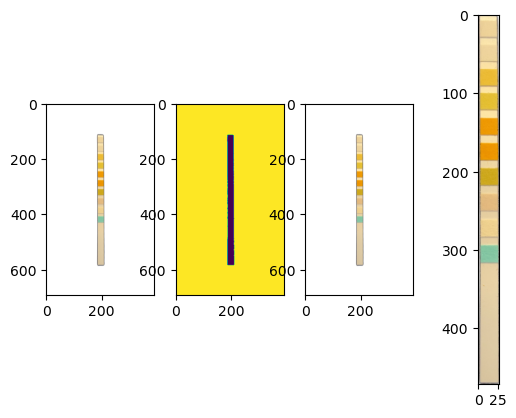

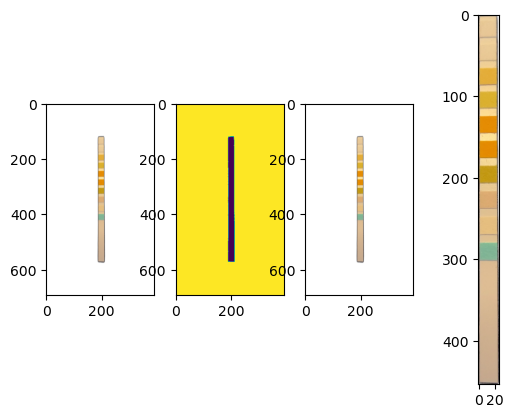

In [11]:
image = cropped_images[0] # the images with a lot of white space

sliced_images = []

def get_dipstick_dimensions(image):
    fig = plt.figure()
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fig.add_subplot(1,4,1)
    plt.imshow(image)
    
    # Apply threshold to the image
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    fig.add_subplot(1,4,2)
    plt.imshow(thresh)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # print how many contours were found
    print(len(contours))

    # draw the contours on the image
    # cv2.drawContours(image, contours, 1, (0,0,255), 2)
    fig.add_subplot(1,4,3)
    plt.imshow(image)

    # Iterate through the contours and select the one that corresponds to the dipstick
    for cnt in contours:
        # print("found")
        x, y, w, h = cv2.boundingRect(cnt)
        if x != 0 and y !=0:
            print(x,y, w, h)
            break
    
    # use these values obtained to crop out only the dipstick
    image_sliced = image[y:y+h, x:x+w]
    fig.add_subplot(1,4,4)
    plt.imshow(image_sliced)

    sliced_images.append(image_sliced)

    return x,y,w,h
    
for image in cropped_images:
    get_dipstick_dimensions(image)


### Resizing Images

(475, 25, 4)
(475, 30, 4)
(475, 25, 4)
(475, 30, 4)
(445, 26, 4)
(475, 30, 4)
(459, 31, 4)
(475, 30, 4)
(456, 25, 4)
(475, 30, 4)
(482, 29, 4)
(475, 30, 4)
(472, 27, 4)
(475, 30, 4)
(454, 25, 4)
(475, 30, 4)


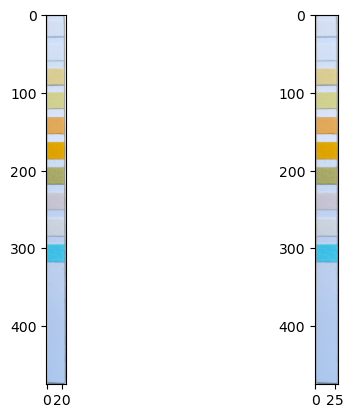

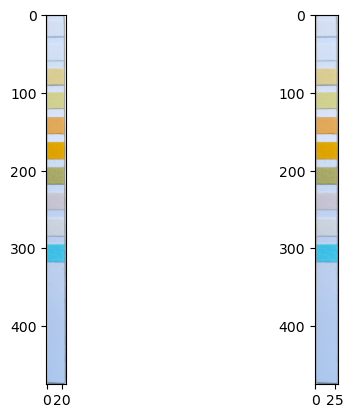

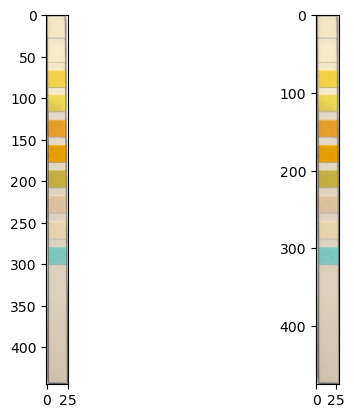

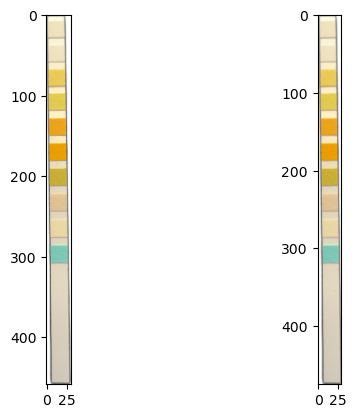

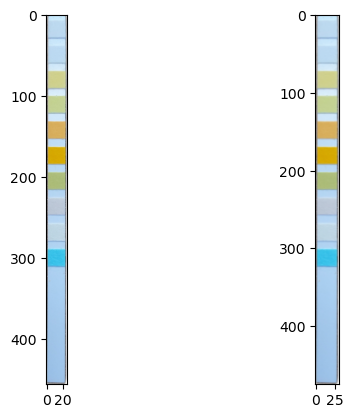

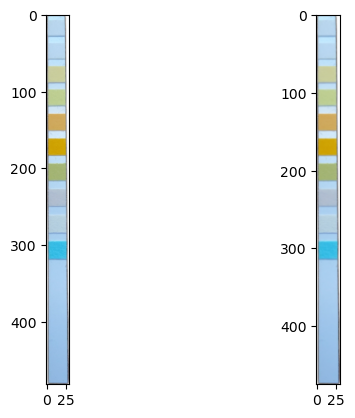

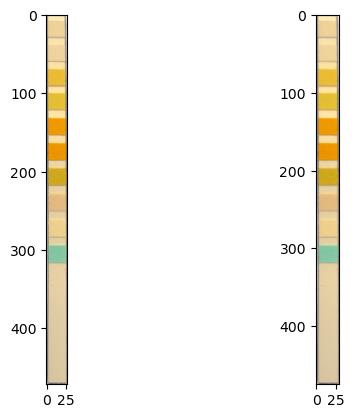

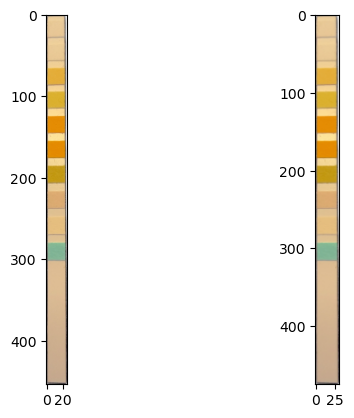

In [12]:
resized_images = []

def resize_image_dimensions(image):
    # plot original image
    fig = plt.figure()
    fig.add_subplot(1,2, 1)
    plt.imshow(image)

    # set dimensions
    dim = (30, 475)
    print(image.shape)

    # resize image
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    fig.add_subplot(1,2, 2)
    plt.imshow(resized)
    print(resized.shape)

    # Append image to array
    resized_images.append(resized)

for image in sliced_images:
    resize_image_dimensions(image)


### Getting colours from coordinates

[212 223 243 254]
[212 224 246 254]
[219 205 145 254]
[208 209 143 254]
[225 168  89 254]
[223 164   0 254]
[167 168 103 254]
[198 196 210 254]
[200 209 222 254]
[ 66 193 232 254]
Printing colours
[array([212, 223, 243, 254], dtype=uint8), array([212, 224, 246, 254], dtype=uint8), array([219, 205, 145, 254], dtype=uint8), array([208, 209, 143, 254], dtype=uint8), array([225, 168,  89, 254], dtype=uint8), array([223, 164,   0, 254], dtype=uint8), array([167, 168, 103, 254], dtype=uint8), array([198, 196, 210, 254], dtype=uint8), array([200, 209, 222, 254], dtype=uint8), array([ 66, 193, 232, 254], dtype=uint8)]
Printing dictionary
{'leukocytes': array([212, 223, 243, 254], dtype=uint8), 'nitrite': array([212, 224, 246, 254], dtype=uint8), 'urobilinogen': array([219, 205, 145, 254], dtype=uint8), 'protein': array([208, 209, 143, 254], dtype=uint8), 'ph': array([225, 168,  89, 254], dtype=uint8), 'blood': array([223, 164,   0, 254], dtype=uint8), 'specific_gravity': array([167, 168, 103, 

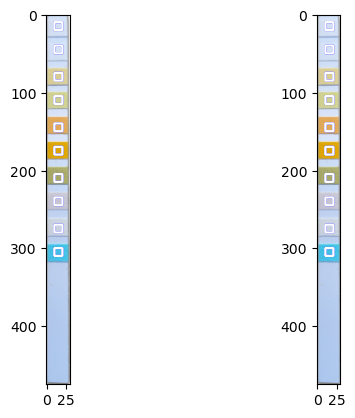

In [34]:
parameter_names = ['leukocytes', 'nitrite', 'urobilinogen', 'protein', 'ph', 'blood', 'specific_gravity', 'ketones', 'bilirubin', 'glucose' ]

colours = []

# variable to save the colours extracted on the pad
extracted_colours = {}

def extract_colour(image, x1, y1, x2, y2):
    
    midpoint_x = round((x1+x2)/ 2)
    midpoint_y = round((y1+y2) / 2)
    colour_on_pad = image[midpoint_y,midpoint_x]
    # print(type(colour_on_pad))
    # colours.append(colour_on_pad)
    print(colour_on_pad)
    return colour_on_pad

def draw_rectangles(image):
    # create a plt and add original image to the plot
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(image)

    # variable of keeping track of the values we have added to the dictionary
    i = 0

    # draw_rectangle on the first pad
    x1,y1 = 10,10
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the second pad
    x1,y1 = 10,40
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the third pad
    x1,y1 = 10,75
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the fourth pad
    x1,y1 = 10,105
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the fifth pad
    x1,y1 = 10,140
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1
    
    # draw_rectangle on the sixth pad
    x1,y1 = 10,170
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the seventh pad
    x1,y1 = 10,205
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the eighth pad
    x1,y1 = 10,235
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the ninth pad
    x1,y1 = 10,270
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    # draw_rectangle on the tenth pad
    x1,y1 = 10,300
    x2,y2 = x1+10, y1+10
    rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    colour = extract_colour(image, x1, y1, x2, y2)
    colours.append(colour)
    extracted_colours[parameter_names[i]] = colour
    i+=1

    fig.add_subplot(1,2,2)
    plt.imshow(rectangle)

# Draw rectangles
draw_rectangles(resized_images[0])


print("Printing colours")
print(colours)
print("Printing dictionary")
print(extracted_colours)



### Put dominant colours into a code structure

### Get domimant colours from image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


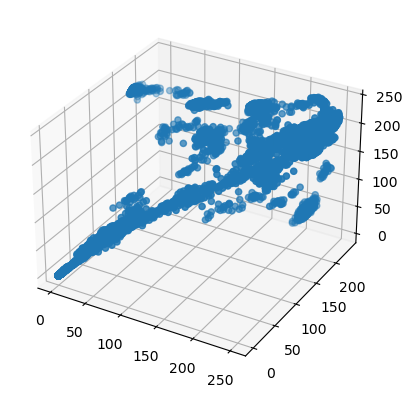

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

#read image
# image_path = shots + '1677405915' + '.png'

# img = cv2.imread(image_path)
img = cropped_images[1]

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
print(r,g,b)
r = r.flatten()
g = g.flatten()
b = b.flatten()
print(r,g,b)


#plotting 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax = Axes3D(fig)
ax.scatter(r, g, b)


# plt.imshow(plot)
plt.show()

### Extracting the top 10 most dominant colours from the dipstick - complete

(500, 40, 4)
[[149 206 211]
 [  0   0   0]
 [242 222 209]
 [232 202 183]
 [ 90 170 224]
 [103 105 100]
 [229 192  68]
 [  3 165 222]
 [104 166 170]
 [182 165 153]
 [ 38  46  51]]


/Users/lanresodeinde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


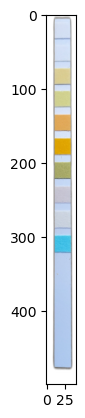

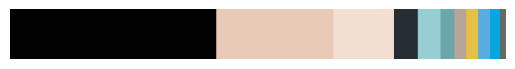

In [15]:
import cv2
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image

    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')    
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()

    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart, cmap='hsv_r')
        # plt.show()
        
    def dominantColors(self):
    
        #read image
        img = self.IMAGE

        print(img.shape)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

# img = 'colors.jpg'
img = reshaped_images[0]
plt.figure()
plt.imshow(img)

clusters = 11
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
dc.plotHistogram()
# dc.plotClusters()

print(colors)

### Extracting single colour from the reference chart

(22, 24, 3)
[[254 246 219]]


/Users/lanresodeinde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


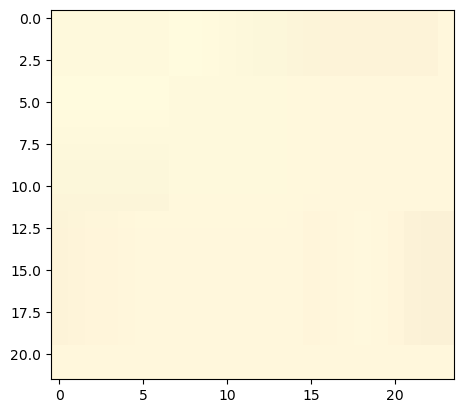

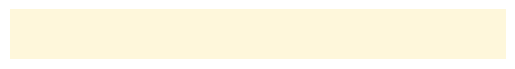

In [16]:
img = cv2.imread('../reference_chart/nitrite_neg.png')
plt.figure()
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2, cmap='hsv_r')

clusters = 1
dc = DominantColors(img, clusters)
colors = dc.dominantColors()
dc.plotHistogram()  
print(colors)

### Extracting all colours from the reference chart

In [87]:
import os
image_names = os.listdir('../reference_chart/')
# print(image_names)

for image_name in image_names:
    if "specific_gravity" in image_name:
        img = cv2.imread(f'../reference_chart/{image_name}')
        clusters = 1
        dc = DominantColors(img, clusters)
        colors = dc.dominantColors()
        # dc.plotHistogram()  
        print(f'{image_name}: {colors}')

(21, 24, 3)
specific_gravity_1.020.png: [[163 144  35]]
(21, 24, 3)
specific_gravity_1.025.png: [[203 162  16]]
(21, 24, 3)
specific_gravity_1.030.png: [[237 176   8]]
(21, 24, 3)
specific_gravity_1.015.png: [[132 128  39]]
(21, 24, 3)
specific_gravity_+1.005.png: [[49 73 59]]
(21, 24, 3)
specific_gravity_1.010.png: [[ 94 105  65]]
(21, 24, 3)
specific_gravity_1.005.png: [[ 4 66 71]]


/Users/lanresodeinde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lanresodeinde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lanresodeinde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lanresodeinde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

### Save colours of reference chart of in arrays

In [89]:
# nitrite = [ [254, 246, 219],[252, 237, 237], [198,  47, 120]]


key_names = ['leukocytes', 'nitrite', 'urobilinogen', 'protein', 'ph', 'blood', 'specific_gravity', 'ketones', 'bilirubin', 'glucose' ]

reference_chart = {
    'nitrite' : {
    'neg': [254, 246, 219],
    'trace': [252, 237, 237],
    'pos': [198,  47, 120],
    }, 

    'leukocytes' : {
        'neg': [253, 241, 221],
        'trace': [252, 225, 188],
        '+70': [251, 235, 235],
        '++125':[234, 189, 208],
        '+++500': [182, 130, 169],
    },
    'urobilinogen': {
        '0.1'  : [247, 199,135],
        '1' : [244, 189, 163],
        '2' : [240, 170, 153],
        '4' : [231, 123, 104],
        '8' : [227,  89, 100],
    }, 
    'protein' :{
        'neg': [243, 224, 118],
        'trace': [225, 209, 81],
        '+30': [198, 206, 129],
        '++100':[182, 193, 101],
        '+++300': [144, 189, 121],
        '++++1000': [ 90, 174, 150],
    },
    'ph' : {
        '5'  : [226, 142, 61],
        '6': [234, 170, 54],
        '6.5' : [225, 182, 42],
        '7' : [204, 188, 15],
        '7.5' : [146, 155, 37],
        '8' : [67, 138,  65],
        '8.5' : [23, 116, 124],
    },
    'blood' : {
        'neg': [239, 177, 9],
        'trace': [225, 180, 11],
        '+25': [158, 151,  58],
        '++80':[142, 158,  83],
        '++200':[30, 95, 78],
        'non_hemolysis+10': [234, 215, 130],
        '++80_rbc': [211, 204, 120],
    },
    'specific_gravity' :{
        '1.030': [237, 176, 8],
        '1.020':[163, 144, 35],
        '1.025' : [203, 162, 16],
    }, 
    'ketones' : {
        'neg'  : [245, 224, 202],
        '+5': [231,184, 164],
        '+15' : [212, 155, 153],
        '++40' : [158,  78,  99],
        '+++80' : [128,  45,  78],
        '++++160' : [111,  48,  72],
    },
    'bilirubin' : {
        'neg'  : [245, 229, 192],
        '+': [245, 229, 192],
        '++' : [229, 190, 154],
        '+++' : [203, 148, 129],
    },
    'glucose': {
        'neg'  : [103, 180 ,161],
        '+100': [203, 148, 129],
        '+250' : [156, 176,  79],
        '++500' : [153, 135,  43],
        '+++1000' : [134,  88,  48],
        '++++2000' :[108,  63,  47],
    }
}




extracted_nitrite = [212, 224, 246]
extracted_leukocytes = [212, 223, 243]

print(extracted_colours)

# ed = (extracted[0] - nitrite[0][0])**2 + (extracted[1] - nitrite[0][1])**2 + (extracted[2] - nitrite[0][2])**2
# print(ed)


# ed = (extracted[0] - nitrite[1][0])**2 + (extracted[1] - nitrite[1][1])**2 + (extracted[2] - nitrite[1][2])**2
# print(ed)
# ed = (extracted[0] - nitrite[2][0])**2 + (extracted[1] - nitrite[2][1])**2 + (extracted[2] - nitrite[2][2])**2
# print(ed)








{'leukocytes': array([212, 223, 243, 254], dtype=uint8), 'nitrite': array([212, 224, 246, 254], dtype=uint8), 'urobilinogen': array([219, 205, 145, 254], dtype=uint8), 'protein': array([208, 209, 143, 254], dtype=uint8), 'ph': array([225, 168,  89, 254], dtype=uint8), 'blood': array([223, 164,   0, 254], dtype=uint8), 'specific_gravity': array([167, 168, 103, 254], dtype=uint8), 'ketones': array([198, 196, 210, 254], dtype=uint8), 'bilirubin': array([200, 209, 222, 254], dtype=uint8), 'glucose': array([ 66, 193, 232, 254], dtype=uint8)}


### Get results

In [91]:
# function for calculting the distance between the two colours
def eucledian_distance(extracted, reference):
    ed = (extracted[0] - reference[0])**2  + (extracted[1] - reference[1])**2 + (extracted[2] - reference[2])**2
    return ed 

# function for check each row / parameter on reference sheet
# this function takes the colour on one pad
# and the dictionary containing the reference colour for that pad
def check_parameter(colour_on_pad, reference_colours_for_pad):
    # define the variables
    ed = 0 # keep tract of eucledian disances
    lowest = '' # keeps track of lowest eucledian distance
    match = '' #

    # loop through the colours in the reference
    for parameter_name in reference_colours_for_pad:
        # get the reference colours for a particular pad
        colour = reference_colours_for_pad.get(parameter_name)

        # calculate eucledian distance between colour on pad and reference colour
        ed = eucledian_distance(colour_on_pad, colour)
    
        # print(f'   {parameter_name}: {ed}')

        # find out which colour is the closest match
        # set lowest to the firstfirst comparison
        if lowest == '':
            lowest = ed
            match = parameter_name

        # if a smaller value is found, update values
        if ed < lowest:
            lowest = ed
            match = parameter_name

    print(f'    Match: {match}')
    return match

# check_parameter(extracted_nitrite, nitrite)
# check_parameter(extracted_leukocytes, leukocytes)


# check the whole dipstick
def check_dipstick(extracted_colours,reference_chart):
    # check each value in the dipstick
    for parameter_name in extracted_colours:
        print(parameter_name)
        check_parameter(extracted_colours.get(parameter_name), reference_chart.get(parameter_name))

check_dipstick(extracted_colours, reference_chart)



leukocytes
    Match: +70
nitrite
    Match: trace
urobilinogen
    Match: 0.1
protein
    Match: +30
ph
    Match: 6
blood
    Match: trace
specific_gravity
    Match: 1.020
ketones
    Match: neg
bilirubin
    Match: neg
glucose
    Match: neg


### Colour Comparison
Compare the colour extracted from the pad to the colour on the reference chart